In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
from nltk.tokenize import sent_tokenize
import pandas as pd
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import config
import tfidf
os.getcwd()

'/Users/mark/src/books/src'

In [6]:
os.listdir(config.dataset_dir)

['.DS_Store',
 'bookdata.csv',
 'bookdata_alt.csv',
 'final_data.csv',
 'output',
 'test',
 'unique_genres.txt']

In [6]:
def make_lex_dict(lexicon_file):
        """
        Convert lexicon file to a dictionary
        """
        lex_dict = {}
        for line in lexicon_file.split('\n'):
            (word, measure) = line.strip().split('\t')[0:2]
            lex_dict[word] = float(measure)
        return lex_dict
    
sent_dict = make_lex_dict(open('/Users/Tristan/books/src/' +'vader_lexicon.txt', 'r').read())


Sentiment analysis. Analysis is performed for each sentence and the sentiment scores kept in lists. Sentiment scores are calculated by averaging the sentiment scores for all sentences.

In [7]:
def return_sentiment_scores(sentence):
    # return just the sentiment scores
    snt = analyser.polarity_scores(sentence)
    return snt

def sentiment_analysis(directory):
    # returns the sentiment of every book in the directory
    data = pd.read_csv(config.dataset_dir + 'output/final_data.csv', index_col=0)
    print(len(data.index))
#     max_amt = len(data.index) + 2
#     print(data.index, len(os.listdir(directory)))
    pos_list = []
    neg_list = []
    neu_list = []
    comp_list = []
    
    # for every book
    for filename in data['filename']:#[:max_amt]:
        
        sub_pos_list = []
        sub_neg_list = []
        sub_neu_list = []
        sub_comp_list = []
        
        # if file is a textfile
        if filename.endswith(".txt"):
            text = open(os.path.join(directory, filename), 'r', errors='replace')
            # for every line in the text
            for line in text.readlines():
                scores = return_sentiment_scores(line)
                # save sentiment scores 
                sub_neg_list.append(scores['neg'])
                sub_neu_list.append(scores['neu'])
                sub_pos_list.append(scores['pos'])
                sub_comp_list.append(scores['compound'])
            
            # then save average sentiment scores for each book
            neg_list.append((sum(sub_neg_list) / float(len(sub_neg_list))))
            pos_list.append((sum(sub_pos_list) / float(len(sub_pos_list))))
            neu_list.append((sum(sub_neu_list) / float(len(sub_neu_list))))
            comp_list.append((sum(sub_comp_list) / float(len(sub_comp_list))))
            
    # convert scores to pandas compatible list
    neg = pd.Series(neg_list)
    pos = pd.Series(pos_list)
    neu = pd.Series(neu_list)
    com = pd.Series(comp_list)

    print(len(neg), len(pos), len(neu), len(com))
    # fill the right columns with the right data
    print(type(data),'type')
    print(neg)
    data['neg score'] = neg.values
    data['pos score'] = pos.values
    data['neu score'] = neu.values
    data['comp score'] = com.values
    data.to_csv(config.dataset_dir + 'output/final_data.csv')
    return data

In [8]:
analyser = SentimentIntensityAnalyzer()                    
sentiment_analysis(config.dataset_dir + 'bookdatabase/books/')

958
958 958 958 958
<class 'pandas.core.frame.DataFrame'> type
0      0.064028
1      0.049711
2      0.047641
3      0.061587
4      0.048907
5      0.057010
6      0.045972
7      0.054442
8      0.037464
9      0.037340
10     0.055954
11     0.041392
12     0.055000
13     0.068802
14     0.041800
15     0.077629
16     0.043438
17     0.026211
18     0.056150
19     0.044526
20     0.034635
21     0.033165
22     0.040971
23     0.054841
24     0.048444
25     0.058575
26     0.052053
27     0.078131
28     0.045618
29     0.059454
         ...   
928    0.040172
929    0.060173
930    0.017144
931    0.038590
932    0.044522
933    0.057267
934    0.061412
935    0.046271
936    0.054442
937    0.061912
938    0.056598
939    0.051939
940    0.057441
941    0.038862
942    0.032124
943    0.042212
944    0.051378
945    0.073029
946    0.043030
947    0.064964
948    0.048816
949    0.043717
950    0.055604
951    0.029775
952    0.035116
953    0.050853
954    0.053077
955    0.

,filename,title.1,author,release year,genre,pos score,neg score,neu score,comp score
title,,,,,,,,,
Jonah,3678.txt,Jonah,Louis Stone,"January, 2003",Poetry,0.063752,0.064028,0.670289,0.001590
The Wind in the Willows,289.txt,The Wind in the Willows,Kenneth Grahame,"July, 1995",Children's literature,0.075622,0.049711,0.708466,0.050425
Akbar,40155-8.txt,Akbar,P. A. S. van Limburg-Brouwer,"July 7, 2012",Syair,0.088927,0.047641,0.701412,0.078233
Erewhon,1906.txt,Erewhon,Samuel Butler,"March 20, 2005",Satire,0.075006,0.061587,0.750951,0.025886
Night and Day,1245.txt,Night and Day,Virginia Woolf,"March, 1998",Romance novel,0.070135,0.048907,0.711205,0.043948
She and Allan,5745.txt,She and Allan,H. Rider Haggard,"April 22, 2006",Fantasy novel,0.067608,0.057010,0.693447,0.020357
The Amateur Cracksman,706.txt,The Amateur Cracksman,E. W. Hornung,"November, 1996",Crime fiction,0.059576,0.045972,0.663071,0.026517
Anne of Geierstein,44247-8.txt,Anne of Geierstein,Walter Scott,"November 21, 2013",Historical novel,0.080691,0.054442,0.716062,0.048409
A Tramp Abroad,5786.txt,A Tramp Abroad,Mark Twain (Samuel Clemens),March 1994,Travel literature,0.062378,0.037464,0.720202,0.047015


We also want to count the amount of positive and negative words as features. We also create a new file for each book with just the sentiment words. As a result, we will be able to do tfidf on these files later and create wordclouds per genre.

In [9]:
def count_sentiment_words(directory):
    sent_words_list =[]
    pos_list = []
    neg_list = []
    
    data = pd.read_csv(config.dataset_dir + 'output/final_data.csv', index_col=0)

    for filename in data['filename']:
        sent_words_list =[]
        pos_count = 0
        neg_count = 0
        
        if filename.endswith(".txt"):
            text = open(os.path.join(directory, filename), 'r', errors='replace')
            sentiment_file = open(config.dataset_dir +'output/sentiment_word_texts/' + filename , 'w')

            for line in text.readlines():
                for word in line.split(" "):
                    if word in sent_dict:
                        if sent_dict[word] >= 0:
                            pos_count += 1
                            sent_words_list.append(word)
                            sentiment_file.write("%s" % word)
                            sentiment_file.write(" ")
                        else:
                            neg_count += 1
                            sentiment_file.write("%s" % word)
                            sentiment_file.write(" ")

            pos_list.append(pos_count)
            neg_list.append(neg_count)
            
    data['amt pos'] = pos_list 
    data['amt neg'] = neg_list
    
    data.to_csv(config.dataset_dir + 'output/final_data.csv')
    return data

count_sentiment_words(config.dataset_dir + 'bookdatabase/books/')


,filename,title.1,author,release year,genre,pos score,neg score,neu score,comp score,amt pos,amt neg
title,,,,,,,,,,,
Jonah,3678.txt,Jonah,Louis Stone,"January, 2003",Poetry,0.063752,0.064028,0.670289,0.001590,2058,2017
The Wind in the Willows,289.txt,The Wind in the Willows,Kenneth Grahame,"July, 1995",Children's literature,0.075622,0.049711,0.708466,0.050425,1684,1172
Akbar,40155-8.txt,Akbar,P. A. S. van Limburg-Brouwer,"July 7, 2012",Syair,0.088927,0.047641,0.701412,0.078233,2988,1652
Erewhon,1906.txt,Erewhon,Samuel Butler,"March 20, 2005",Satire,0.075006,0.061587,0.750951,0.025886,2506,1952
Night and Day,1245.txt,Night and Day,Virginia Woolf,"March, 1998",Romance novel,0.070135,0.048907,0.711205,0.043948,4822,3088
She and Allan,5745.txt,She and Allan,H. Rider Haggard,"April 22, 2006",Fantasy novel,0.067608,0.057010,0.693447,0.020357,3234,2652
The Amateur Cracksman,706.txt,The Amateur Cracksman,E. W. Hornung,"November, 1996",Crime fiction,0.059576,0.045972,0.663071,0.026517,1363,1072
Anne of Geierstein,44247-8.txt,Anne of Geierstein,Walter Scott,"November 21, 2013",Historical novel,0.080691,0.054442,0.716062,0.048409,3268,2205
A Tramp Abroad,5786.txt,A Tramp Abroad,Mark Twain (Samuel Clemens),March 1994,Travel literature,0.062378,0.037464,0.720202,0.047015,642,387


In [9]:
import pandas as pd

In [1]:
def read_unique_genres():
    genres_file = open(config.dataset_dir + 'unique_genres.txt', 'r')
    return[genre.strip('\n') for genre in genres_file.readlines()]

In [27]:
def wordcloud_per_genre(plot_wc=False):
    data = pd.read_csv(config.dataset_dir + 'final_data.csv')
    genres_file = open(config.dataset_dir + 'unique_genres.txt', 'r')
    genre_list = [genre.strip('\n') for genre in genres_file.readlines()]
    directory = config.dataset_dir + 'output/sentiment_word_texts/'
    tfidf_dict_per_genre = {}
    
    for genre in genre_list:
        books_of_genre = data.loc[data['genre'] == genre]
        book_list = []
        for book in books_of_genre['filename']:
            book_list.append(book)
            
        if len(book_list) > 1:
            print(genre)
            index = tfidf.create_index(directory, book_list)
            tf_matrix = tfidf.create_tf_matrix(directory, book_list)
            tfidf_dict = tfidf.perform_tfidf(directory, book_list, index, tf_matrix)
            tfidf_dict_per_genre[genre] = tfidf_dict
            if plot_wc:
                try:
                    w = WordCloud(background_color='white', width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False)
                    wordcloud = w.generate_from_frequencies(tfidf_dict)
                except ZeroDivisionError:
                    continue

                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis("off")
                plt.savefig(config.dataset_dir + 'output/wordclouds/' + genre + '.png')
    return tfidf_dict_per_genre

tfidf_dict_per_genre = wordcloud_per_genre()

Diary and Novel
Fantasy literature
War
Epistolary novel
Short stories
Bush poetry
Fantasy novel
Sketch story
Romance novel
Autobiographical novel
Romantic novel
Young-adult fiction
Non-fiction
Poetry
Historical
Non-Fiction
Christian fiction
Encyclopedia
Thriller (genre)
Satirical
Crime fiction
Prose poetry
Young adult fiction
Philosophy
Humor
Historical fantasy
Detective fiction
Biography in literature
Decadent movement
Cookbook
Textbook
Essay
History of Ideas
Adventure novel
Family saga
Mystery novel
Short story
Novella
Children's literature
Biographical novel
Comedy
Science fantasy
Detective novel
Lost World (genre)
Social commentary
Political journalism
Adventure fiction
Nonfiction
Picture book
Comic novel
Horror novel
Comedy novel
Science
Science fiction
Historical Fiction
Travel literature
Literary realism
Historical fiction
Fiction
Tragedy
Dystopian novel
Children's book
Black comedy
Fantasy/Ethnic novel
Crime novel
Economics
Gothic fiction
Satire
Syair
Temperance movement
Sword 

In [36]:
list(tfidf_dict_per_genre.keys())[:4]

['Diary and Novel', 'Fantasy literature', 'War', 'Epistolary novel']

In [40]:
len(list(tfidf_dict_per_genre.keys()))

122

In [38]:
len(tfidf_dict_per_genre['Diary and Novel']) # may differ per genre

1097

In [44]:
n_words_per_genre = 100

In [58]:
sample = tfidf_dict_per_genre['War']
i = list(sample.keys())[-1]
sample[i]

0.0

In [59]:
max(list(sample.values()))

0.0

In [61]:
sample

{'abandon': 0.0,
 'abandoned': 0.0,
 'abandons': 0.0,
 'abilities': 0.0,
 'ability': 0.0,
 'abuse': 0.0,
 'accept': 0.0,
 'accepted': 0.0,
 'accepting': 0.0,
 'accident': 0.0,
 'accidental': 0.0,
 'accidentally': 0.0,
 'accidents': 0.0,
 'accomplish': 0.0,
 'accomplished': 0.0,
 'accused': 0.0,
 'active': 0.0,
 'adequate': 0.0,
 'admirable': 0.0,
 'admiration': 0.0,
 'admire': 0.0,
 'admirers': 0.0,
 'admit': 0.0,
 'admits': 0.0,
 'admitted': 0.0,
 'adopt': 0.0,
 'adopts': 0.0,
 'advanced': 0.0,
 'advantage': 0.0,
 'advantageous': 0.0,
 'advantages': 0.0,
 'adversaries': 0.0,
 'adversary': 0.0,
 'adverse': 0.0,
 'affected': 0.0,
 'affectionate': 0.0,
 'affections': 0.0,
 'aggravate': 0.0,
 'aggravated': 0.0,
 'aggression': 0.0,
 'aggressor': 0.0,
 'agree': 0.0,
 'agreed': 0.0,
 'agreement': 0.0,
 'alarmed': 0.0,
 'alarming': 0.0,
 'alarms': 0.0,
 'alive': 0.0,
 'allow': 0.0,
 'alone': 0.0,
 'animosity': 0.0,
 'antagonism': 0.0,
 'antagonistic': 0.0,
 'anxious': 0.0,
 'anxiously': 0.0,


## Generate labels file

In [62]:
import pandas, os
import data, config
from utils import io

In [63]:
info = pandas.read_csv(config.dataset_dir + 'final_data.csv')
book_list = os.listdir(config.dataset_dir + 'output/sentiment_word_texts')
labels = data.extract_genres(info, book_list)

In [3]:
labels

{'1005.txt': ['Christian fiction'],
 '1024.txt': ['Adventure novel'],
 '1027.txt': ['Western novel'],
 '103.txt': ['Travel literature'],
 '1051.txt': ['Comic novel'],
 '1056.txt': ['Künstlerroman'],
 '106.txt': ['Adventure novel'],
 '1065.txt': ['Fantasy novel'],
 '1066-0.txt': ["Children's literature"],
 '1074-0.txt': ['Adventure novel'],
 '1076.txt': ['Fantasy'],
 '108.txt': ['Detective fiction'],
 '1080.txt': ['Satire'],
 '1081.txt': ['Political'],
 '111.txt': ["Children's literature"],
 '113.txt': ["Children's literature"],
 '1138.txt': ['Novel'],
 '1142.txt': ['Young adult novel'],
 '1153.txt': ['Science fantasy'],
 '1156.txt': ['Satire'],
 '1160.txt': ['Detective fiction'],
 '1164.txt': ['Dystopian novel'],
 '1188.txt': ['Horror novel'],
 '1195.txt': ["Children's books"],
 '1198.txt': ['Adventure novel'],
 '12.txt': ["Children's fiction"],
 '1202.txt': ['Frame story'],
 '1207.txt': ['Historical'],
 '1228.txt': ['Science'],
 '123.txt': ['Fantasy novel'],
 '1231.txt': ['Cryptozoolo

In [4]:
io.save_dict_to_csv(config.dataset_dir, 'labels', labels)

'../datasets/labels.csv'

# (oud)
Choose to most important to be kept in the feature-vector

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
import data, config, tfidf

In [13]:
directory = config.dataset_dir + 'output/sentiment_word_texts'
book_list = os.listdir(directory)
book_list = book_list[:20]

In [9]:
index = tfidf.create_index(directory, book_list)
tf_matrix = tfidf.create_tf_matrix(directory, book_list)

In [15]:
tfidf_dict = tfidf.perform_tfidf(directory, book_list, index, tf_matrix)

In [23]:
# (optional) show the result
w = WordCloud(background_color='white', width=900, height=500, 
                      max_words=1628,relative_scaling=1,normalize_plurals=False)
wordcloud = w.generate_from_frequencies(tfidf_dict)

(-0.5, 899.5, 499.5, -0.5)

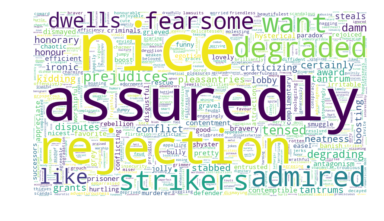

In [24]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig(config.dataset_dir + 'output/wordclouds/' + genre + '.png')

In [28]:
# tfidf_dict_per_genre = wordcloud_per_genre()